Cosmology Calculator by James Schombert 
http://www.astro.ucla.edu/~wright/CC.python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from math import *

In [2]:
# Pick cosmology and range of redshifts
H0 = 69.6  # Hubble constant km/s/Mpc
WM = 0.286 # Omega(matter)
WV = 0.714 # Omega(vacuum) or lambda

In [3]:
# initialize constants

WR = 0.        # Omega(radiation)
WK = 0.        # Omega curvaturve = 1-Omega(total)
c = 299792.458 # velocity of light in km/sec
Tyr = 977.8    # coefficent for converting 1/H into Gyr
DTT = 0.5      # time from z to now in units of 1/H0
DTT_Gyr = 0.0  # value of DTT in Gyr
age = 0.5      # age of Universe in units of 1/H0
age_Gyr = 0.0  # value of age in Gyr
zage = 0.1     # age of Universe at redshift z in units of 1/H0
zage_Gyr = 0.0 # value of zage in Gyr
DCMR = 0.0     # comoving radial distance in units of c/H0
DCMR_Mpc = 0.0 
DCMR_Gyr = 0.0
DA = 0.0       # angular size distance
DA_Mpc = 0.0
DA_Gyr = 0.0
kpc_DA = 0.0
DL = 0.0       # luminosity distance
DL_Mpc = 0.0
DL_Gyr = 0.0   # DL in units of billions of light years
V_Gpc = 0.0
a = 1.0        # 1/(1+z), the scale factor of the Universe
az = 0.5       # 1/(1+z(object))

In [4]:
def CalcConstants(z):
  h = H0/100.
  WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
  WK = 1-WM-WR-WV
  az = 1.0/(1+1.0*z)      ######
  age = 0.
  n=1000         # number of points in integrals
  for i in range(n):
    a = az*(i+0.5)/n
    adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
    age = age + 1./adot
    
  zage = az*age/n
  zage_Gyr = (Tyr/H0)*zage
  DTT = 0.0    # travel time
  DCMR = 0.0   # comoving radial distance

# do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
  for i in range(n):
    a = az+(1-az)*(i+0.5)/n
    adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
    DTT = DTT + 1./adot
    DCMR = DCMR + 1./(a*adot)

  DTT = (1.-az)*DTT/n
  DCMR = (1.-az)*DCMR/n
  age = DTT+zage
  age_Gyr = age*(Tyr/H0)
  DTT_Gyr = (Tyr/H0)*DTT
  DCMR_Gyr = (Tyr/H0)*DCMR
  DCMR_Mpc = (c/H0)*DCMR

# tangential comoving distance

  ratio = 1.00
  x = sqrt(abs(WK))*DCMR
  if x > 0.1:
    if WK > 0:
      ratio =  0.5*(exp(x)-exp(-x))/x
    else:
      ratio = sin(x)/x
  else:
    y = x*x
    if WK < 0: y = -y
    ratio = 1. + y/6. + y*y/120.
  DCMT = ratio*DCMR                      ###### tangential comoving distance
  DA = az*DCMT                           ######    angular diameter distance = tangential comoving distance /(1+z)
  DA_Mpc = (c/H0)*DA                     ######    
  kpc_DA = DA_Mpc/206.264806             ######     angular scale is the angular diameter distance/206265
  DA_Gyr = (Tyr/H0)*DA
  DL = DA/(az*az)
  DL_Mpc = (c/H0)*DL
  DL_Gyr = (Tyr/H0)*DL

# comoving volume computation

  ratio = 1.00
  x = sqrt(abs(WK))*DCMR
  if x > 0.1:
    if WK > 0:
      ratio = (0.125*(exp(2.*x)-exp(-2.*x))-x/2.)/(x*x*x/3.)
    else:
      ratio = (x/2. - sin(2.*x)/4.)/(x*x*x/3.)
  else:
    y = x*x
    if WK < 0: y = -y
    ratio = 1. + y/5. + (2./105.)*y*y
  VCM = ratio*DCMR*DCMR*DCMR/3.
  V_Gpc = 4.*pi*((0.001*c/H0)**3)*VCM

  verbose = 0
  if verbose == 1:
    print 'For H_o = ' + '%1.1f' % H0 + ', Omega_M = ' + '%1.2f' % WM + ', Omega_vac = ',
    print '%1.2f' % WV + ', z = ' + '%1.3f' % z
    print 'It is now ' + '%1.1f' % age_Gyr + ' Gyr since the Big Bang.'
    print 'The age at redshift z was ' + '%1.1f' % zage_Gyr + ' Gyr.'
    print 'The light travel time was ' + '%1.1f' % DTT_Gyr + ' Gyr.'
    print 'The comoving radial distance, which goes into Hubbles law, is',
    print '%1.1f' % DCMR_Mpc + ' Mpc or ' + '%1.1f' % DCMR_Gyr + ' Gly.'
    print 'The comoving volume within redshift z is ' + '%1.1f' % V_Gpc + ' Gpc^3.'
    print 'The angular size distance D_A is ' + '%1.1f' % DA_Mpc + ' Mpc or',
    print '%1.1f' % DA_Gyr + ' Gly.'
    print 'This gives a scale of ' + '%.2f' % kpc_DA + ' kpc/".'
    print 'The luminosity distance D_L is ' + '%1.1f' % DL_Mpc + ' Mpc or ' + '%1.1f' % DL_Gyr + ' Gly.'
    print 'The distance modulus, m-M, is '+'%1.2f' % (5*log10(DL_Mpc*1e6)-5)

  return kpc_DA


In [5]:
CalcConstants(4.0)

7.096574091222991

In [6]:
z_array = np.arange(0.1,2.0,0.02)
scale_array = np.zeros(len(z_array))
i = 0
for z in z_array:
  scale_array[i] = CalcConstants(z)  # can set to whatever cosmology (use with Omega_m = 0.286)
  i = i +1

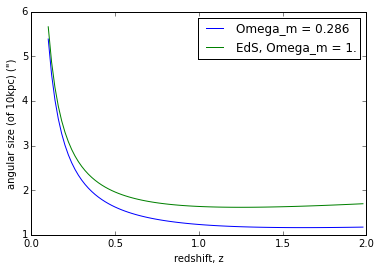

In [7]:
plt.plot(z_array,10./scale_array,label='Omega_m = 0.286')  # 10kpc/(__kpc/")
plt.xlabel('redshift, z')
plt.ylabel('angular size (of 10kpc) (\")')

z = z_array
size = 0.01  # (Mpc) = 10kpc
# angular diameter distance in Einstein de Sitter universe:
d_A = 2.*c/(69.6) * 1./(1.+z)*(1.-1./np.sqrt(1.+z))
# angular size:
dTheta = size/d_A *206275.

plt.plot(z,dTheta, label='EdS, Omega_m = 1.')
plt.legend()

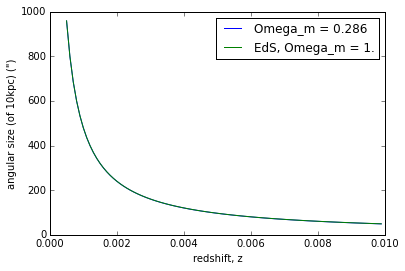

In [8]:
# Great so it works!  We are interested in very low redshift, though, so let's investigate z = 0.0005 to z = 0.1
# (correspond to rough distances of 2Mpc - 40Mpc)

z_array = np.arange(0.0005,0.01,0.0001)
scale_array = np.zeros(len(z_array))
i = 0
for z in z_array:
  scale_array[i] = CalcConstants(z)  # can set to whatever cosmology (use with Omega_m = 0.286)
  i = i +1
    
plt.plot(z_array,10./scale_array,label='Omega_m = 0.286')  # 10kpc/(__kpc/")
plt.xlabel('redshift, z')
plt.ylabel('angular size (of 10kpc) (\")')

z = z_array
size = 0.01  # (Mpc) = 10kpc
# angular diameter distance in Einstein de Sitter universe:
d_A = 2.*c/(69.6) * 1./(1.+z)*(1.-1./np.sqrt(1.+z))
# angular size:
dTheta = size/d_A *206275.

plt.plot(z,dTheta, label='EdS, Omega_m = 1.')
plt.legend()

Notice that both cosmologies are super similar on this near universe scale.

We want to see where it fits just right into the FOV of Dragonfly.  If we instead look at a 5Mpc scale (rather than 10kpc), and mark out the angular size of Dragonfly FOV (~7200").


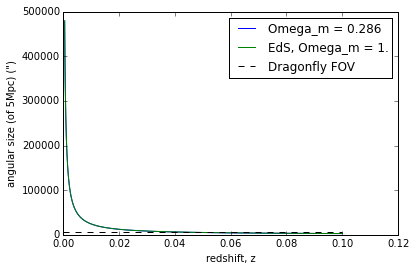

In [9]:
# lambda CDM universe (numerically integrate)
z_array = np.arange(0.0005,0.1,0.0001)
scale_array = np.zeros(len(z_array))
i = 0
for z in z_array:
  scale_array[i] = CalcConstants(z)  # can set to whatever cosmology (use with Omega_m = 0.286)
  i = i +1
    
size_kpc = 5000.
size_Mpc = size_kpc/1000.
plt.plot(z_array,size_kpc/scale_array,label='Omega_m = 0.286')  # 5000kpc/(__kpc/")

# Einstein de Sitter Universe (can analytically calculate)
z = z_array
# angular diameter distance in Einstein de Sitter universe:
d_A = 2.*c/(69.6) * 1./(1.+z)*(1.-1./np.sqrt(1.+z))
scale_EdS = d_A/206275.

plt.plot(z,size_Mpc/scale_EdS , label='EdS, Omega_m = 1.')
plt.plot([0,0.1],[7200.,7200.],'k--',label='Dragonfly FOV')

plt.legend()
plt.xlabel('redshift, z')
plt.ylabel('angular size (of 5Mpc) (\")')

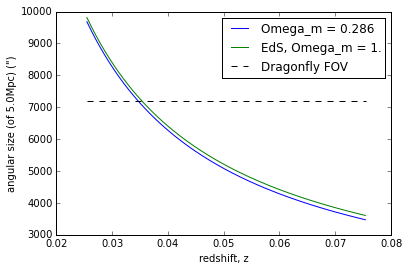

In [10]:
# Let's zoom in on that region where the FOV is optimized

plt.plot(z_array[250:750],size_kpc/scale_array[250:750],label='Omega_m = 0.286')  # 5000kpc/(__kpc/")
plt.plot(z[250:750],size_Mpc/scale_EdS[250:750], label='EdS, Omega_m = 1.')
plt.plot([z[250],z[750]],[7200.,7200.],'k--',label='Dragonfly FOV')
plt.xlabel('redshift, z')
plt.ylabel('angular size (of '+str(size_Mpc)+'Mpc) (\")')
plt.legend()

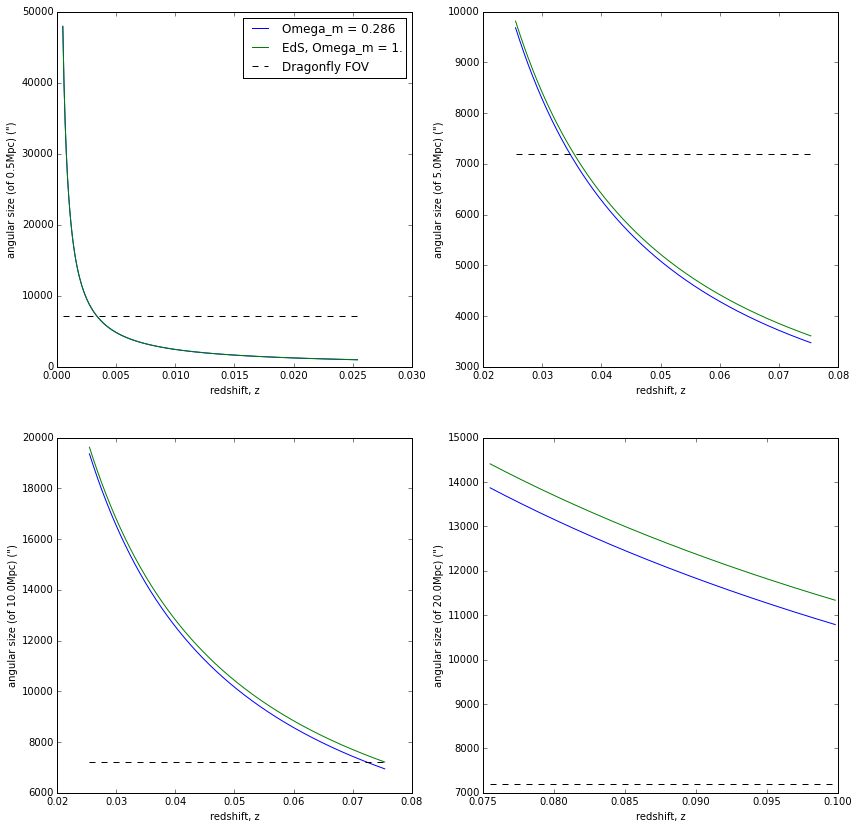

In [11]:
# We can repeat this for different size regions, let's do 500kpc, 5Mpc, 10Mpc, 20Mpc

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(14,14))
size_kpc = 500.
size_Mpc = size_kpc/1000.
first = 0
second = 250
ax1.plot(z_array[first:second],size_kpc/scale_array[first:second],label='Omega_m = 0.286')  # 5000kpc/(__kpc/")
ax1.plot(z[first:second],size_Mpc/scale_EdS[first:second], label='EdS, Omega_m = 1.')
ax1.plot([z[first],z[second]],[7200.,7200.],'k--',label='Dragonfly FOV')
ax1.set_xlabel('redshift, z')
ax1.set_ylabel('angular size (of '+str(size_Mpc)+'Mpc) (\")') 
ax1.legend()

size_kpc = 5000.
size_Mpc = size_kpc/1000.
first  = 250
second = 750
ax2.plot(z_array[first:second],size_kpc/scale_array[first:second],label='Omega_m = 0.286')  # 5000kpc/(__kpc/")
ax2.plot(z[first:second],size_Mpc/scale_EdS[first:second], label='EdS, Omega_m = 1.')
ax2.plot([z[first],z[second]],[7200.,7200.],'k--',label='Dragonfly FOV')
ax2.set_xlabel('redshift, z')
ax2.set_ylabel('angular size (of '+str(size_Mpc)+'Mpc) (\")') 

size_kpc = 10000.
size_Mpc = size_kpc/1000.
first  = 250
second = 750
ax3.plot(z_array[first:second],size_kpc/scale_array[first:second],label='Omega_m = 0.286')  # 5000kpc/(__kpc/")
ax3.plot(z[first:second],size_Mpc/scale_EdS[first:second], label='EdS, Omega_m = 1.')
ax3.plot([z[first],z[second]],[7200.,7200.],'k--',label='Dragonfly FOV')
ax3.set_xlabel('redshift, z')
ax3.set_ylabel('angular size (of '+str(size_Mpc)+'Mpc) (\")') 

size_kpc = 20000.
size_Mpc = size_kpc/1000.
first  = 750
second = len(z)-1
ax4.plot(z_array[first:second],size_kpc/scale_array[first:second],label='Omega_m = 0.286')  # 5000kpc/(__kpc/")
ax4.plot(z[first:second],size_Mpc/scale_EdS[first:second], label='EdS, Omega_m = 1.')
ax4.plot([z[first],z[second]],[7200.,7200.],'k--',label='Dragonfly FOV')
ax4.set_xlabel('redshift, z')
ax4.set_ylabel('angular size (of '+str(size_Mpc)+'Mpc) (\")') 
